In [27]:
#!pip install scipy
#!pip install matplotlib
#!pip install yfinance
#!pip install statsmodels
import pandas as pd
import yfinance as yf

In [28]:
DAX = yf.download(tickers = "^GDAXI",
                        start="2000-01-01",
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )

[*********************100%***********************]  1 of 1 completed


In [29]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,15570.799805,15668.080078,15542.169922,15554.179688,15554.179688,43947600
2021-06-29,15565.830078,15752.929688,15555.490234,15690.589844,15690.589844,50284300
2021-06-30,15700.059570,15709.339844,15461.200195,15531.040039,15531.040039,63950700
2021-07-01,15624.280273,15708.780273,15488.490234,15603.809570,15603.809570,49570300
2021-07-02,15644.839844,15705.530273,15616.429688,15642.839844,15642.839844,0


In [30]:
# Statistical Analysis for the DAX30

In [31]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [32]:
DAX=DAX.loc["2020-01-01":"2020-12-31"]

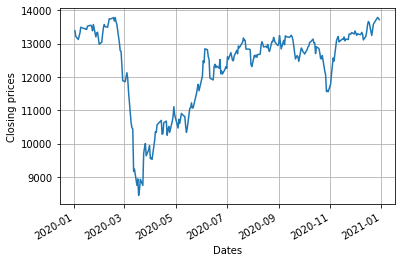

In [33]:
DAX.Close.plot(label="DAX")
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing prices")
plt.show()

/home/german/web/quantitative-portfolio-management/env/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


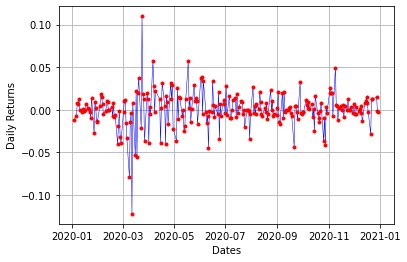

In [34]:
DAX["return"] = DAX["Close"]/DAX["Close"].shift(1)-1
plt.plot(DAX["return"],'b',lw=0.5) # thickness of the line
plt.plot(DAX["return"],'r.') # the points appear in red
plt.grid (True)
plt.xlabel('Dates')
plt.ylabel('Daily Returns')
plt.show()

In [35]:
from scipy import stats

In [36]:
from scipy.stats import norm 

Date
2020-01-03   -0.012460
2020-01-06   -0.006971
2020-01-07    0.007606
2020-01-08    0.007058
2020-01-09    0.013129
                ...   
2020-12-22    0.012970
2020-12-23    0.012604
2020-12-28    0.014945
2020-12-29   -0.002096
2020-12-30   -0.003096
Name: return, Length: 253, dtype: float64

In [40]:
print("stat returns: ", stats.describe(DAX["return"][1:]))

stat returns:  DescribeResult(nobs=253, minmax=(-0.1223861487212149, 0.10975899955959934), mean=0.00031451229904396524, variance=0.0004323353181308165, skewness=-0.5651247235324754, kurtosis=7.919298742303436)


(array([ 0.17026284,  0.17026284,  0.34052568,  2.55394257,  8.17261621,
        25.70968849,  5.27814797,  0.51078851,  0.        ,  0.17026284]),
 array([-0.12238615, -0.09917163, -0.07595712, -0.0527426 , -0.02952809,
        -0.00631357,  0.01690094,  0.04011546,  0.06332997,  0.08654448,
         0.109759  ]),
 <BarContainer object of 10 artists>)

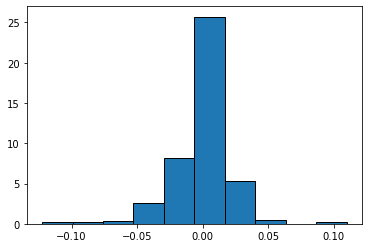

In [42]:
import matplotlib.mlab as mlab
returns = DAX["return"][1:]
plt.hist(returns, edgecolor="black",density=True,bins=10)

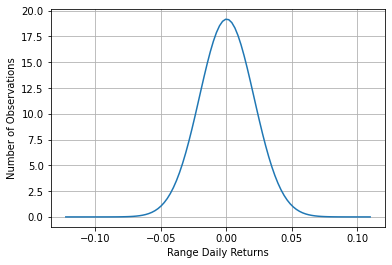

In [43]:
meanR = float(np.mean(returns))
sdevR = float(np.std(returns,ddof=1))
minR = float(np.min(returns))
maxR = float(np.max(returns))
x = np.linspace(minR,maxR,100)
plt.plot(x,norm.pdf(x,meanR,sdevR))
plt.grid(True)
plt.xlabel("Range Daily Returns")
plt.ylabel("Number of Observations")
plt.show()

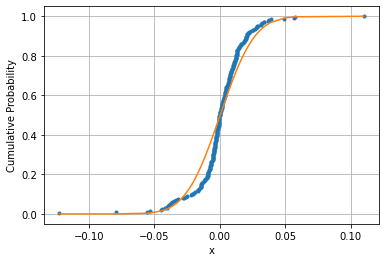

In [47]:
# comparison cumulative distrubution functions
x = np.sort(DAX["return"][1:])
y = np.arange(1,len(x)+1) / float(len(x))
meanR = np.mean(x)
sdevR = np.std(x)
y1 = norm.cdf((x-meanR)/sdevR)
plt.plot(x,y,marker=".",linestyle="none")
plt.plot(x,y1)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.show()

/home/german/web/quantitative-portfolio-management/env/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


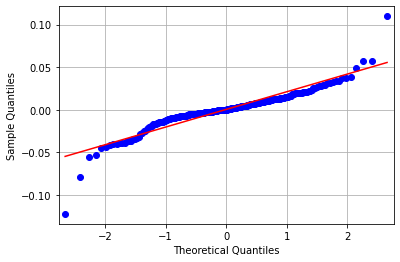

In [51]:
# Henry Sline QQ Plot
import statsmodels.api as sm
data = DAX["return"][1:]
sm.qqplot(data,line="s")
plt.grid(True)
plt.show()